### Problem Set 2b

In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram
import numpy as np

### Problem 1

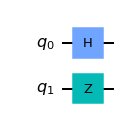

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


In [3]:
# Question 1 (a)

# Defining the circuit and the initial state |psi> = |00>
circ1 = QuantumCircuit(2)
psi1 = Statevector.from_label('00')

# Build your circuit here
circ1.h(0)
circ1.z(1)

# Drawing the circuit you built
display(circ1.draw('mpl'))

# Evolving the Statevector based on the circuit you constructed
psi1.evolve(circ1)

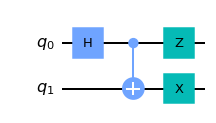

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


In [5]:
# Question 1 (b)

# Defining the circuit and the initial state |psi> = |00>
circ2 = QuantumCircuit(2)
psi2 = Statevector.from_label('00')

# Build your circuit here
circ2.h(0)
circ2.cx(0,1)
circ2.z(0)
circ2.x(1)
# Draw the circuit you built
display(circ2.draw('mpl'))
# Evolve the Statevector based on the circuit you constructed:

psi2.evolve(circ2)

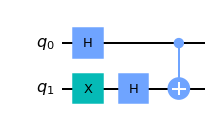

Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


In [6]:
# Question 1 (c)

# Defining the circuit and the initial state |psi> = |00>
circ3 = QuantumCircuit(2)
psi3 = Statevector.from_label('00')

# Build your circuit here
circ3.h(0)
circ3.x(1)
circ3.h(1)
circ3.cx(0,1)
# Draw the circuit you built
display(circ3.draw('mpl'))
# Evolve the Statevector based on the circuit you constructed:

psi2.evolve(circ3)


## Problem 2: Construct all 4 bell states

$\frac{(|00\rangle +|11\rangle )}{\sqrt {2}} = |\Phi ^{+}\rangle $

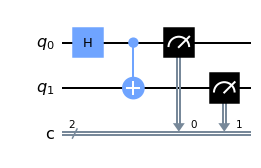

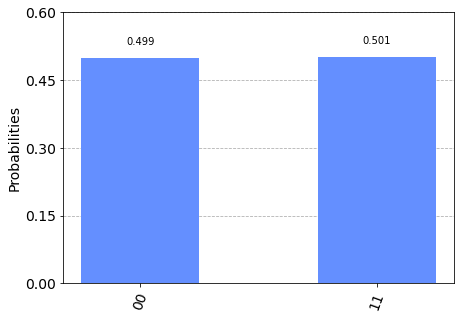

In [20]:
phiPlus = QuantumCircuit(2,2)

# Build and draw circuit
phiPlus.h(0)
phiPlus.cx(0,1)
phiPlus.measure([0,1],[0,1])
display(phiPlus.draw('mpl'))
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = backend.run(phiPlus, shots = 4200).result() # use result to get counts


# Plot histogram with counts
output = result.get_counts()
plot_histogram(output)


$\frac{(|00\rangle -|11\rangle )}{\sqrt {2}} = |\Phi ^{-}\rangle $

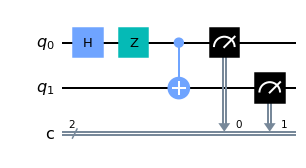

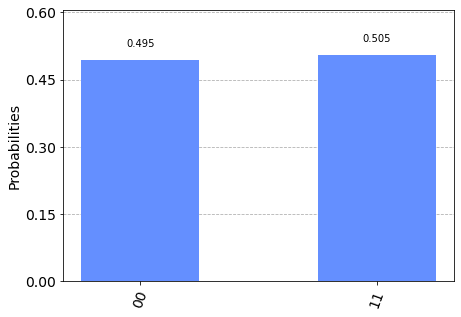

In [21]:
phiMinus = QuantumCircuit(2,2)

# Build and draw circuit
phiMinus.h(0)
phiMinus.z(0)
phiMinus.cx(0,1)
phiMinus.measure([0,1],[0,1])
display(phiMinus.draw('mpl'))
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = backend.run(phiMinus, shots = 4200).result() # use result to get counts


# Plot histogram with counts
output = result.get_counts()
plot_histogram(output)


$\frac{(|01\rangle -|10\rangle )}{\sqrt {2}} = |\Psi ^{-}\rangle $

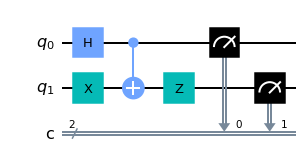

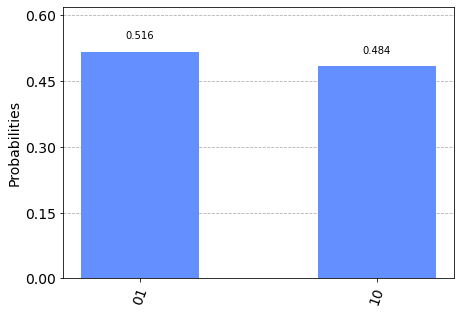

In [22]:
psiMinus = QuantumCircuit(2,2)

# Build and draw circuit
psiMinus.h(0)
psiMinus.x(1)
psiMinus.cx(0,1)
psiMinus.z(1)
psiMinus.measure([0,1],[0,1])
display(psiMinus.draw('mpl'))
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = backend.run(psiMinus, shots = 4200).result() # use result to get counts


# Plot histogram with counts
output = result.get_counts()
plot_histogram(output)


$\frac{(|01\rangle +|10\rangle )}{\sqrt {2}} = |\Psi ^{+}\rangle $

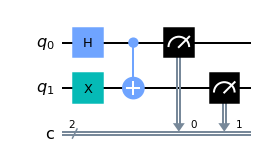

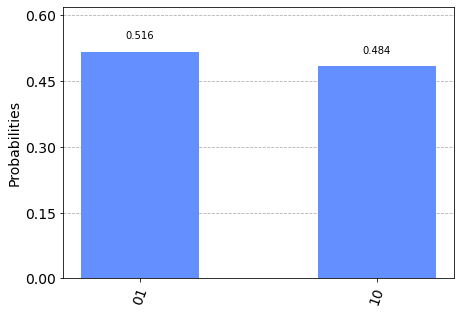

In [23]:
psiPlus = QuantumCircuit(2,2)

# Build and draw circuit
psiPlus.h(0)
psiPlus.x(1)
psiPlus.cx(0,1)

psiPlus.measure([0,1],[0,1])
display(psiPlus.draw('mpl'))
# Simulate on Aer and get counts
backend = Aer.get_backend('aer_simulator')
result = backend.run(psiPlus, shots = 4200).result() # use result to get counts


# Plot histogram with counts
output = result.get_counts()
plot_histogram(output)


The initial steps to create a bell pair, remains same for all the four bell pairs, i.e a  hadamard gate and a cnot gate, then according to the preferences, we apply Z gate to change the sign or X gate to flip the initial bit from 0 to 1.


While running it for 4200 shots, we get approximately 50-50% probabilities of state being in that form.
Although while doing this on a quantum computer, will yield a different result, because of error.

### Problem 3

In [63]:
from qiskit import IBMQ
IBMQ.load_account() 

IBMQ.providers()

ibmqfactory.load_account:WARNING:2021-07-06 23:04:58,068: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [64]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
shots = 1024


### Runnig all the bell states in Original Quantum Computer and seeing the Error

In [27]:
# phi plus
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

job = execute(phiPlus,backend= backend, shots = 1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
result

least busy backend:  ibmqx2
Job Status: job has successfully run


Result(backend_name='ibmqx2', backend_version='2.3.6', qobj_id='a984091c-32b5-4d73-8b52-f160ebb71191', job_id='60e47a1cff60e8415dfc6006', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 332, '0x1': 178, '0x2': 209, '0x3': 305}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.7853981633974483, memory_slots=2, metadata={}, n_qubits=5, name='circuit-29', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2021-07-06 21:13:33+05:30, status=Successful completion, status=QobjHeader(backend_name='ibmqx2', backend_version='2.3.6'), time_taken=2.97170090675354, execution_id='ea64df12-de70-11eb-9da0-ac1f6b91f43c', client_version={'qiskit': '0.26.0'})

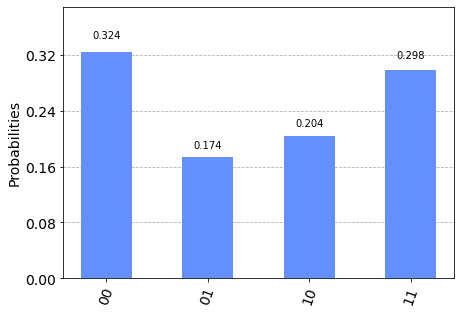

In [28]:
output = result.get_counts()
plot_histogram(output)

In [30]:
# phi minus
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

job = execute(phiMinus,backend= backend, shots = 1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
result

least busy backend:  ibmqx2
Job Status: job has successfully run


Result(backend_name='ibmqx2', backend_version='2.3.6', qobj_id='daa22ff4-ebfd-4c76-8473-39c3e1452a11', job_id='60e47a96f4c43acdb968bf78', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 325, '0x1': 180, '0x2': 206, '0x3': 313}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=2.356194490192344, memory_slots=2, metadata={}, n_qubits=5, name='circuit-30', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2021-07-06 21:15:33+05:30, status=Successful completion, status=QobjHeader(backend_name='ibmqx2', backend_version='2.3.6'), time_taken=3.138873815536499, execution_id='3209a5f0-de71-11eb-8920-ac1f6b91f43c', client_version={'qiskit': '0.26.0'})

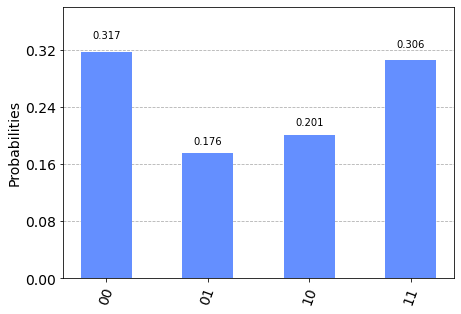

In [31]:
output = result.get_counts()
plot_histogram(output)

In [33]:
# psi minus
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

job = execute(psiMinus,backend= backend, shots = 1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
result

least busy backend:  ibmqx2
Job Status: job has successfully run


Result(backend_name='ibmqx2', backend_version='2.3.6', qobj_id='35dc35f7-4988-43cf-9e9a-33bd517a4880', job_id='60e47f146e109970526514d5', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 199, '0x1': 318, '0x2': 325, '0x3': 182}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=2.356194490192345, memory_slots=2, metadata={}, n_qubits=5, name='circuit-31', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2021-07-06 21:34:45+05:30, status=Successful completion, status=QobjHeader(backend_name='ibmqx2', backend_version='2.3.6'), time_taken=3.0086522102355957, execution_id='e0aa3ef6-de73-11eb-8260-ac1f6b91f43c', client_version={'qiskit': '0.26.0'})

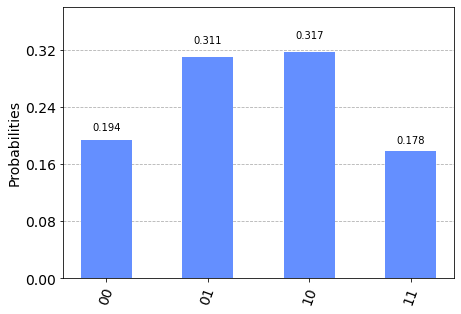

In [34]:
output = result.get_counts()
plot_histogram(output)

In [ ]:
# psi plus
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

job = execute(psiPlus,backend= backend, shots = 1024)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
result

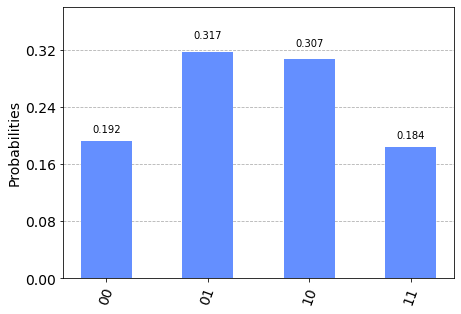

In [36]:
output = result.get_counts()
plot_histogram(output)

The simulator runs jobs as though is was in an ideal environment; one without noise or decoherence. However, when jobs are run on the real devices there is noise from the environment and decoherence, which causes the qubits to behave differently than what is intended.

### grovers algo on actual qc

In [59]:
PI = np.pi

def groverCircuit(target):

    target_list = [int(x) for x in str(target)] #Converts the target into a list (e.g '1001' => [1,0,0,1])
    n = len(target_list) #Length of target list (i.e nbr of qubits)
    counter = [i for i in range(n)] #List containing integers from 0 to num_qubits - 1

    #Defining a CnP gate. Note that CnP(PI) = CNZ
    def mcp(self, lam, control_qubits, target_qubit):
        from qiskit.circuit.library import MCPhaseGate
        num_ctrl_qubits = len(control_qubits)
        return self.append(MCPhaseGate(lam, num_ctrl_qubits), control_qubits[:] + [target_qubit],
                    [])

    #Sub-circuit 1: Hadamard on all qubits
    def hadamards(target):
        hadCirc = QuantumCircuit(n,n)
        hadCirc.h(counter)
        hadCirc.barrier()
        return hadCirc

    #Sub-circuit 2: Oracle 
    def oracle(target):
        filtered = [counter[i] for i in range(n) if target_list[i]==0] #Filtering the counter list to only the indices where target==0
        oracleCirc = QuantumCircuit(n,n)
        if filtered != []:
            oracleCirc.x(filtered) #In other words, if target only has 1s, do nothing 
        mcp(oracleCirc, np.pi, [i for i in range(n-1)],n-1)
        if filtered != []:
            oracleCirc.x(filtered) #Applying X gates to the qubits which represent 0
        oracleCirc.barrier()
        return oracleCirc

    #Sub-circuit 3: Amplifier
    def amplification(target):
        ampCirc = QuantumCircuit(n,n)
        ampCirc.h(counter)
        ampCirc.x(counter)
        mcp(ampCirc, np.pi, [i for i in range(n-1)],n-1)
        ampCirc.x(counter)
        ampCirc.h(counter)
        ampCirc.barrier()
        return ampCirc

    k = round(PI*n/4 - 0.5) #Ideal number of iterations. k = π/4 * √N - 1/2. 

    circuit = hadamards(target) 

    for i in range(k): #Iterating the oracle and amplification 
        circuit+=oracle(target)
        circuit+= amplification(target)

    circuit.measure(counter, counter)
    return circuit

In [60]:
from qiskit.tools.visualization import plot_histogram
circuit = groverCircuit('1001')



<ipython-input-59-92322f76ec42>:51: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  circuit+=oracle(target)
C:\Users\Monit Sharma\.conda\envs\quantum\lib\site-packages\qiskit\circuit\quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


least busy backend:  ibmq_belem


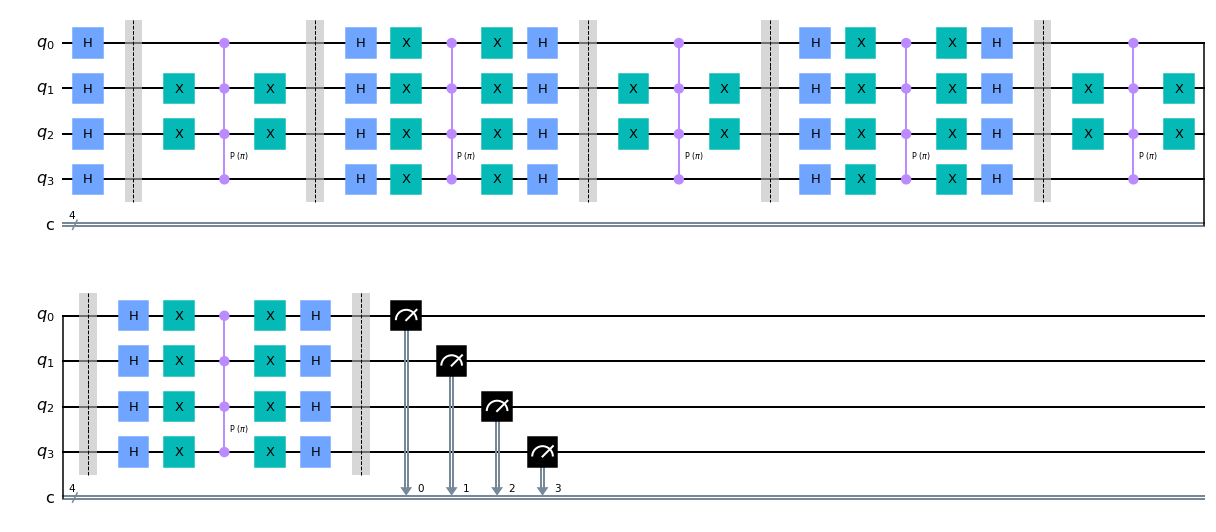

In [65]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 4 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

result = execute(circuit,backend= backend, shots = 1024).result()
output = result.get_counts()
circuit.draw('mpl')

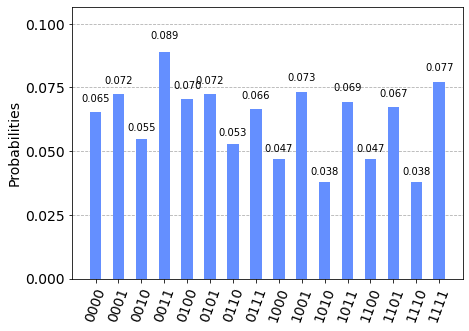

In [66]:
plot_histogram(output)

#### Comparing it with Simulator

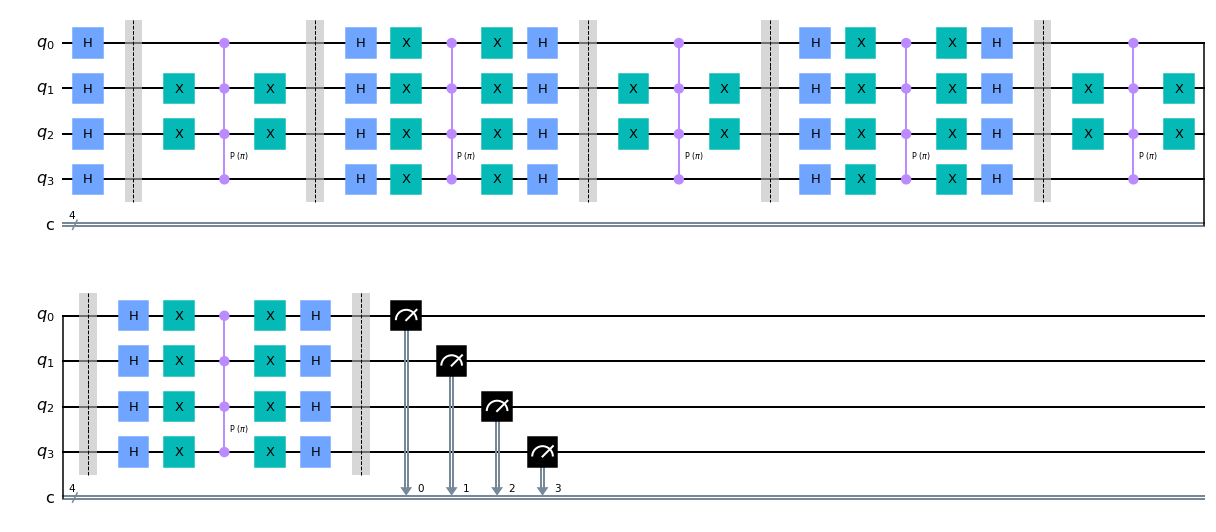

In [67]:
from qiskit.tools.visualization import plot_histogram
circuit = groverCircuit('1001')

backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend, shots = 420).result()
output = result.get_counts()
circuit.draw('mpl')

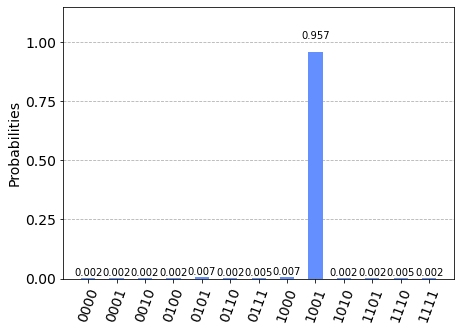

In [68]:
plot_histogram(output)

The Error rate is very much high , when the number of gates and the number of qubits are increased.

## Bonus

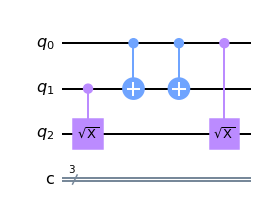

In [76]:
# make a CCX gate Toffoli using the theorem

circ = QuantumCircuit(3,3)

circ.csx(1,2)
circ.cx(0,1)

circ.cx(0,1)
circ.csx(0,2)

display(circ.draw('mpl'))


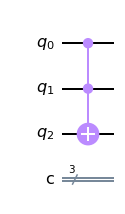

In [77]:
# an orginial CCX gate
circ2 = QuantumCircuit(3,3)
circ2.ccx(0,1,2)
display(circ2.draw('mpl'))

### Simulating Statevector for Both

In [78]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ,backend = simulator).result()
psi = result.get_statevector()
psi

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

In [79]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ2,backend = simulator).result()
psi1 = result.get_statevector()
psi1

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

### Getting Unitary Matrix for both

In [82]:
simulator = Aer.get_backend('unitary_simulator')
result = execute(circ,backend = simulator).result()
U = result.get_unitary()

print(U)

[[1. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j ]
 [0. +0.j  0.5+0.5j 0. +0.j  0. +0.j  0. +0.j  0.5-0.5j 0. +0.j  0. +0.j ]
 [0. +0.j  0. +0.j  0.5+0.5j 0. +0.j  0. +0.j  0. +0.j  0.5-0.5j 0. +0.j ]
 [0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  1. +0.j ]
 [0. +0.j  0. +0.j  0. +0.j  0. +0.j  1. +0.j  0. +0.j  0. +0.j  0. +0.j ]
 [0. +0.j  0.5-0.5j 0. +0.j  0. +0.j  0. +0.j  0.5+0.5j 0. +0.j  0. +0.j ]
 [0. +0.j  0. +0.j  0.5-0.5j 0. +0.j  0. +0.j  0. +0.j  0.5+0.5j 0. +0.j ]
 [0. +0.j  0. +0.j  0. +0.j  1. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j ]]


In [83]:
simulator = Aer.get_backend('unitary_simulator')
result = execute(circ2,backend = simulator).result()
U1 = result.get_unitary()

print(U1)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]


Both the Unitary Matrix and statevector are same.